## Sentiment Analysis in Python
 
 In this notebook we will be doing some sentiment analysis in python using two different techniques:

1.  VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach 

2.  Roberta Pretrained Model

                                                                           
Table of Contents

Sentiment Analysis in Pytho

Step 1. Read in Data and NLTK Basics

Step 2. VADER Seniment Scoring

Step 3. Roberta Pretrained Model

Step 4. Combine and compare

Step 5: Review Examples:

Extra: The Transformers Pipeline

The End                                                                    


## Step 1. Read in Data and NLTK Basics

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
plt.style.use('ggplot')

In [10]:
# Reading the data
review = pd.read_csv('Reviews.csv')
review.shape

(568454, 10)

In [12]:
df = review[:500]
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [13]:
df.shape

(500, 10)

In [14]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [15]:
# quick eda

In [16]:
df['Score'].value_counts()

5    339
4     70
3     37
1     36
2     18
Name: Score, dtype: int64

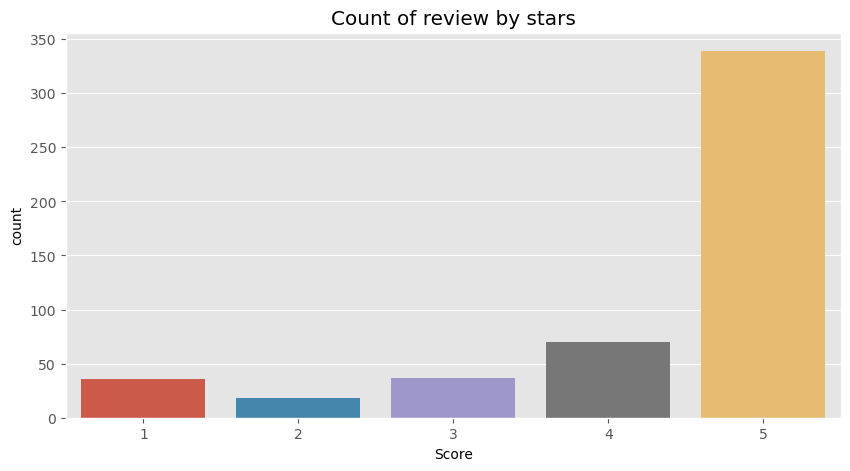

In [21]:
plt.figure(figsize=(10,5))
plt.title('Count of review by stars')
sns.countplot(x=df['Score'])
plt.show()

### Basics NLTK 

In [24]:
expample = df['Text'][50]
expample

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [26]:
tokens = nltk.word_tokenize(expample)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [29]:
tagged =nltk.pos_tag(tokens)
tagged[:5]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ')]

In [33]:
chunck = nltk.chunk.ne_chunk(tagged)
chunck.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


## Step 2. VADER Seniment Scoring
 
We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

This uses a "bag of words" approach:

1. Stop words are removed

2. each word is scored and combined to a total score.

In [35]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [36]:
sen = SentimentIntensityAnalyzer()

In [39]:
sen.polarity_scores('I hate u')

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5719}

In [40]:
sen.polarity_scores('I love u')

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}

In [41]:
sen.polarity_scores(expample)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [42]:
# Run the polarity score on the entire dataset

In [44]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sen.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [46]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index' :'Id'})
vaders = vaders.merge(df, how='left')

In [48]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Plot VADER results

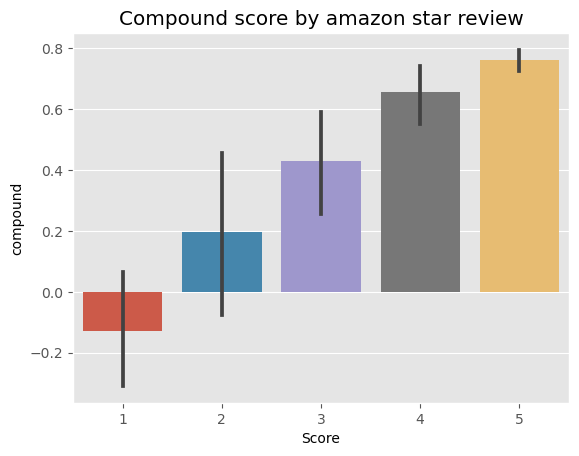

In [49]:
ax = sns.barplot(data=vaders,x=vaders['Score'],y=vaders['compound'])
ax.set_title('Compound score by amazon star review')
plt.show()

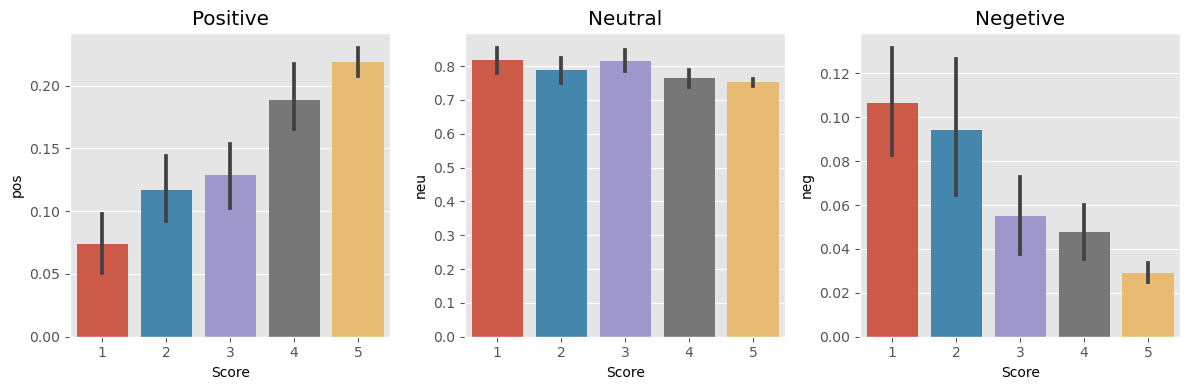

In [59]:
fig, axs = plt.subplots(1,3, figsize =(12,4))
sns.barplot(data=vaders, x='Score', y='pos', ax = axs[0])
sns.barplot(data=vaders, x='Score', y='neu',ax = axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negetive')
plt.tight_layout()
plt.show()

## Step 3. Roberta Pretrained Model

Use a model trained of a large corpus of data.

Transformer model accounts for the words but also the context related to other words.

In [ ]:
#pip install transformers

In [60]:
# Roberta pretrained model
from transformers import AutoTokenizer

In [62]:
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [64]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

C:\Users\user\anaconda3\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\user\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [69]:
# vender model score
print(expample)
sen.polarity_scores(expample)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [68]:
# Run the Roberta Model
encoded_txt = tokenizer(expample, return_tensors='pt')
output = model(**encoded_txt)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'Roberta_neg' : scores[0],
    'Roberta_neu' : scores[1],
    'Roberta_pos' : scores[2]
}
print(scores_dict)

{'Roberta_neg': 0.97635514, 'Roberta_neu': 0.020687481, 'Roberta_pos': 0.0029573753}


In [75]:
def polarity_score_reberta(examples):
    encoded_txt = tokenizer(expample, return_tensors='pt')
    output = model(**encoded_txt)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
       'Roberta_neg' : scores[0],
       'Roberta_neu' : scores[1],
       'Roberta_pos' : scores[2]
     }

    return scores_dict

In [80]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        veder_results = sen.polarity_scores(text)
        veder_results_rename = {}
        for key,value in veder_results.items():
            veder_results_rename[f"vader_{key}"] = value
        roberta_result = polarity_score_reberta(text)
        both = {**veder_results_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f"Broken for id {myid}")
        
    
    

  0%|          | 0/500 [00:00<?, ?it/s]

In [97]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [99]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'Roberta_neg', 'Roberta_neu', 'Roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

## Step 4. Combine and compare

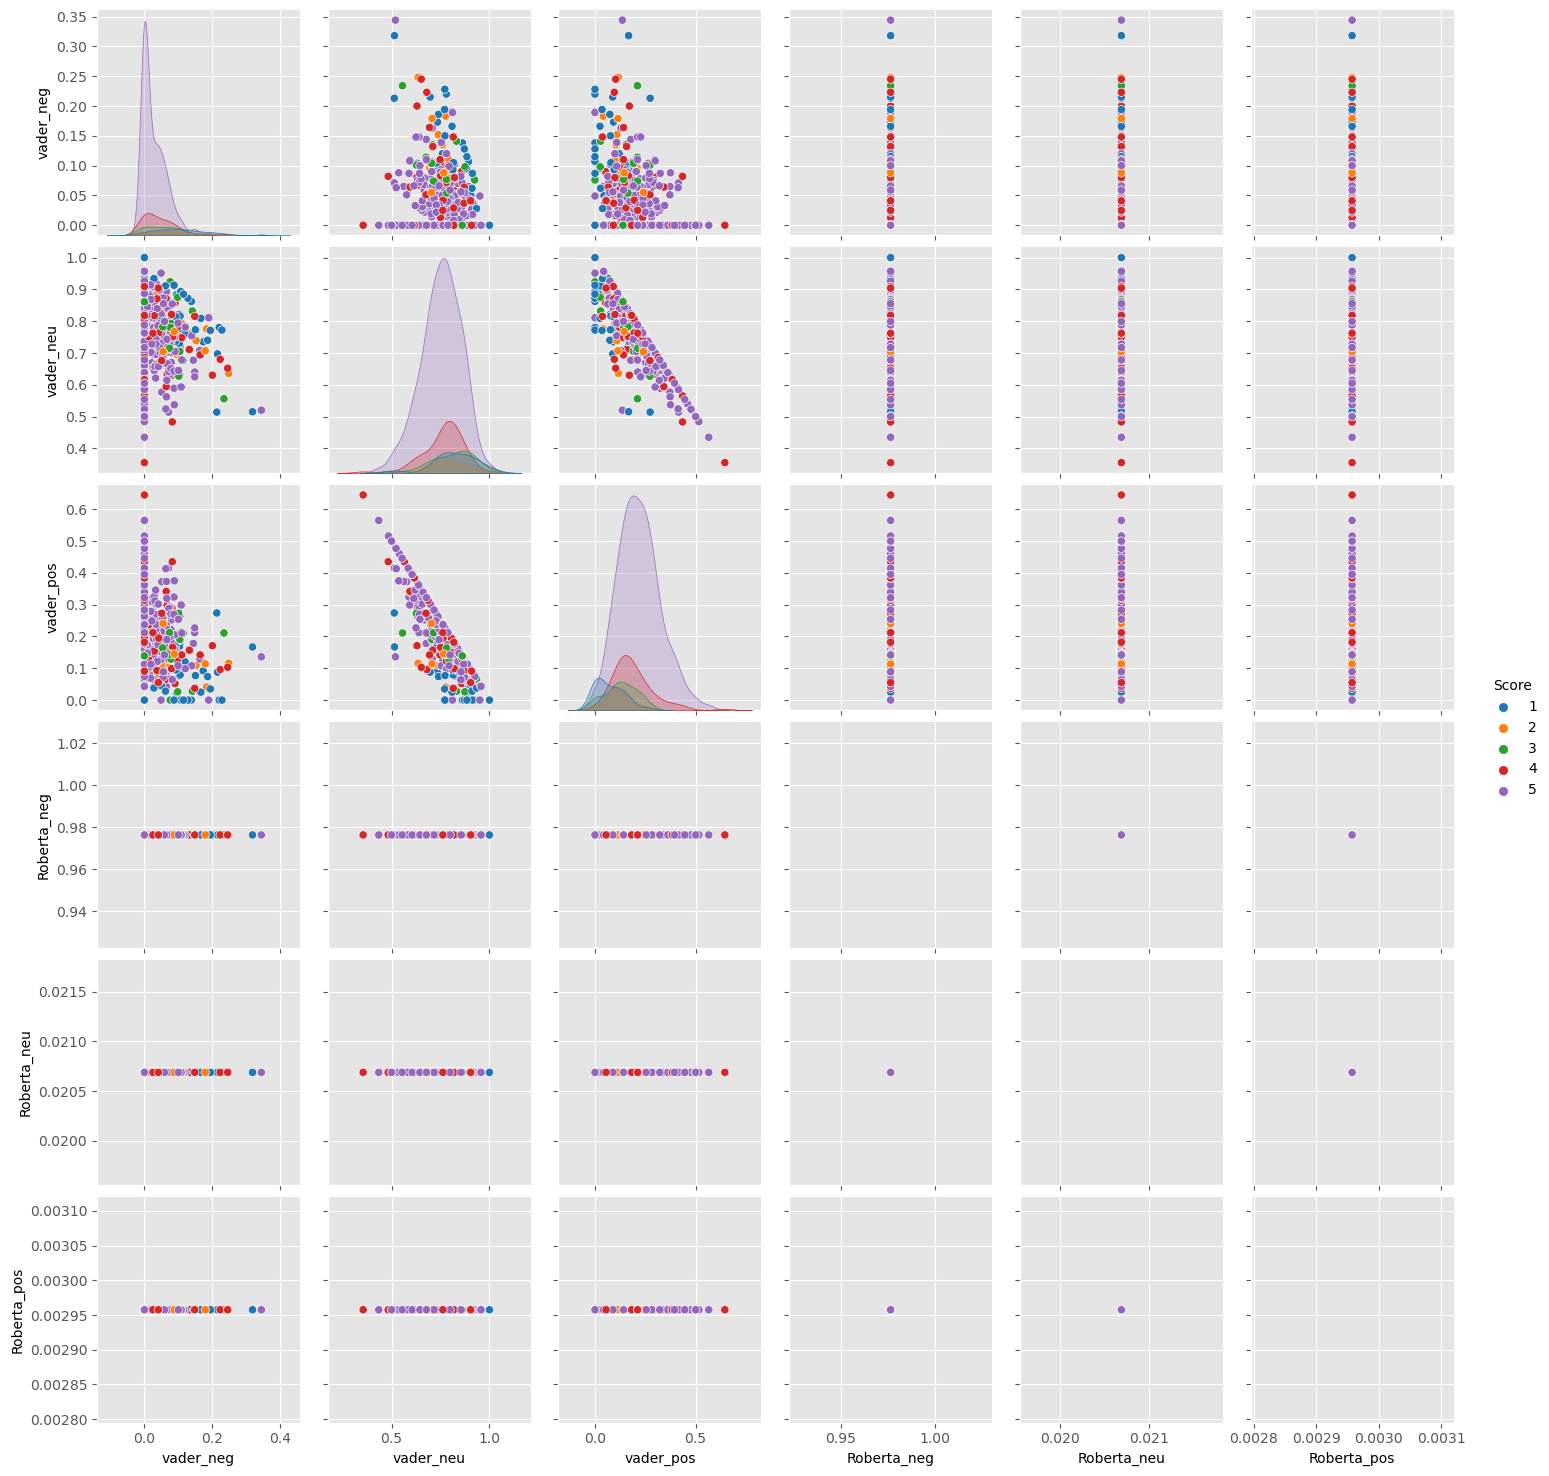

In [100]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'Roberta_neg', 'Roberta_neu', 'Roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

## Step 5: Review Examples:

Positive 1-Star and Negative 5-Star Reviews

Lets look at some examples where the model scoring and review score differ the most.

In [111]:
# positive sentiment 1-Star view

In [112]:
results_df.query('Score == 1') \
    .sort_values('Roberta_pos', ascending=False)['Text'].values[0]

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [113]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [114]:
# nevative sentiment 5-Star view

In [115]:
results_df.query('Score == 5') \
    .sort_values('Roberta_neg', ascending=False)['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [116]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [117]:
#pip install transformers

## Extra: The Transformers Pipeline
    
Quick & easy way to run sentiment predictions

In [118]:
from transformers import pipeline

#sent_pipeline = pipeline("sentiment-analysis")

In [119]:
#sent_pipeline("i love sentimental analysis")

In [120]:
#sent_pipeline('i like sentimental analysis')

In [121]:
#sent_pipeline('i hate this')

## END